<a href="https://colab.research.google.com/github/RituAnilkumar/nnrms/blob/main/day4/vector_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector Analysis
Link to code: https://colab.research.google.com/drive/1T6dAl-CM35rIDaXJL7bQ_SJsb-Em3N2q?usp=sharing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Before we jump into the lecture, let's learn a bit more about indicing of arrays. There is a type of indicing called Boolean indicing. Let's see this with an example. We are defining and array a and pplying a relational operation on the array. We will get an output of an array with Boolean values (True or False). If we use this Boolean array to index the original array, the values associated with true are picked out.

In [2]:
a=np.array([1,4,1,3,2,6])

In [3]:
a>2

array([False,  True, False,  True, False,  True])

In [4]:
a[a>2]

array([4, 3, 6])

Now heading back vector analysis. First steps as before, install the libraries of our interest. We are installing folum and mapclassify to demonstrate how to improve visualization of the vector files.

In [5]:
import geopandas as gpd
import folium
!pip install mapclassify
import mapclassify

In [6]:
# The below command is to access the data for the tutorial. You may follow the link to explore.
!git clone https://github.com/RituAnilkumar/nnrms.git

Cloning into 'nnrms'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 146 (delta 23), reused 0 (delta 0), pack-reused 94
Receiving objects: 100% (146/146), 39.77 MiB | 39.31 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [7]:
!unzip /content/nnrms/day3/vector.zip

Archive:  /content/nnrms/day3/vector.zip
   creating: vector/
  inflating: vector/NL_DISTRICT_BOUNDARY_1575.cpg  
  inflating: vector/NL_DISTRICT_BOUNDARY_1575.dbf  
  inflating: vector/NL_DISTRICT_BOUNDARY_1575.prj  
  inflating: vector/NL_DISTRICT_BOUNDARY_1575.shp  
  inflating: vector/NL_DISTRICT_BOUNDARY_1575.shx  
  inflating: vector/tourist_spot_1575.cpg  
  inflating: vector/tourist_spot_1575.dbf  
  inflating: vector/tourist_spot_1575.prj  
  inflating: vector/tourist_spot_1575.shp  
  inflating: vector/tourist_spot_1575.shx  


In [8]:
poly_shp=gpd.read_file('/content/vector/NL_DISTRICT_BOUNDARY_1575.shp')
poly_shp

OGC_FID    DISTRICT     STATE     AREA_SQ_M  ASCII_ID  \
0         1         Mon  Nagaland  2.184031e+09       0.0   
1         2    Longleng  Nagaland  5.666508e+08       0.0   
2         3  Mokokchung  Nagaland  1.626065e+09       0.0   
3         4       Wokha  Nagaland  1.623852e+09       0.0   
4         5    Tuensang  Nagaland  2.153503e+09       0.0   
5         6       Peren  Nagaland  1.714333e+09       0.0   
6         7     Kiphire  Nagaland  1.126545e+09       0.0   
7         8        Phek  Nagaland  1.855884e+09       0.0   
8         9   Zunheboto  Nagaland  1.570305e+09       0.0   
9        10     Dimapur  Nagaland  8.698457e+08       0.0   
10       11      Kohima  Nagaland  1.292621e+09       0.0   

                                             geometry  
0   POLYGON ((95.19297 27.03202, 95.19315 27.03201...  
1   POLYGON ((94.79416 26.79625, 94.79455 26.79613...  
2   POLYGON ((94.73584 26.76448, 94.73623 26.76395...  
3   POLYGON ((94.28240 26.53391, 94.28226 26.53331...  
4   POLYGON ((94.91017 26.37729, 94.91021 26.37725...  
5   POLYGON ((93.53998 25.69971, 93.54087 25.69945...  
6   POLYGON ((95.01725 25.88778, 95.01726 25.88780...  
7   POLYGON ((94.45529 25.84898, 94.45550 25.84887...  
8   POLYGON ((94.58683 26.21229, 94.58703 26.21206...  
9   POLYGON ((93.77606 25.96983, 93.77617 25.96861...  
10  POLYGON ((94.21567 26.02002, 94.21591 26.02002...

The explore() can be used to visualize the shapefiles with an interactive OSM map in the background. This is for your information. We will not use this in the subsequent sections.

In [9]:
poly_shp.explore()

## Field Calculation

If we would like to compute the area of each district, here's how we will go about it.

In [10]:
poly_shp.head()

OGC_FID    DISTRICT     STATE     AREA_SQ_M  ASCII_ID  \
0        1         Mon  Nagaland  2.184031e+09       0.0   
1        2    Longleng  Nagaland  5.666508e+08       0.0   
2        3  Mokokchung  Nagaland  1.626065e+09       0.0   
3        4       Wokha  Nagaland  1.623852e+09       0.0   
4        5    Tuensang  Nagaland  2.153503e+09       0.0   

                                            geometry  
0  POLYGON ((95.19297 27.03202, 95.19315 27.03201...  
1  POLYGON ((94.79416 26.79625, 94.79455 26.79613...  
2  POLYGON ((94.73584 26.76448, 94.73623 26.76395...  
3  POLYGON ((94.28240 26.53391, 94.28226 26.53331...  
4  POLYGON ((94.91017 26.37729, 94.91021 26.37725...

In [11]:
poly_shp['area1']=poly_shp['geometry'].area
poly_shp.head()

<ipython-input-11-78fe00708924>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  poly_shp['area1']=poly_shp['geometry'].area


OGC_FID    DISTRICT     STATE     AREA_SQ_M  ASCII_ID  \
0        1         Mon  Nagaland  2.184031e+09       0.0   
1        2    Longleng  Nagaland  5.666508e+08       0.0   
2        3  Mokokchung  Nagaland  1.626065e+09       0.0   
3        4       Wokha  Nagaland  1.623852e+09       0.0   
4        5    Tuensang  Nagaland  2.153503e+09       0.0   

                                            geometry     area1  
0  POLYGON ((95.19297 27.03202, 95.19315 27.03201...  0.198038  
1  POLYGON ((94.79416 26.79625, 94.79455 26.79613...  0.051327  
2  POLYGON ((94.73584 26.76448, 94.73623 26.76395...  0.147181  
3  POLYGON ((94.28240 26.53391, 94.28226 26.53331...  0.146629  
4  POLYGON ((94.91017 26.37729, 94.91021 26.37725...  0.194427

In [12]:
poly_shp['area2']=poly_shp['geometry'].to_crs({'proj':'cea'}).area
poly_shp.head()

OGC_FID    DISTRICT     STATE     AREA_SQ_M  ASCII_ID  \
0        1         Mon  Nagaland  2.184031e+09       0.0   
1        2    Longleng  Nagaland  5.666508e+08       0.0   
2        3  Mokokchung  Nagaland  1.626065e+09       0.0   
3        4       Wokha  Nagaland  1.623852e+09       0.0   
4        5    Tuensang  Nagaland  2.153503e+09       0.0   

                                            geometry     area1         area2  
0  POLYGON ((95.19297 27.03202, 95.19315 27.03201...  0.198038  2.184031e+09  
1  POLYGON ((94.79416 26.79625, 94.79455 26.79613...  0.051327  5.666508e+08  
2  POLYGON ((94.73584 26.76448, 94.73623 26.76395...  0.147181  1.626065e+09  
3  POLYGON ((94.28240 26.53391, 94.28226 26.53331...  0.146629  1.623852e+09  
4  POLYGON ((94.91017 26.37729, 94.91021 26.37725...  0.194427  2.153503e+09

We can modify the values by applying the same techniques as creating a new column. Let's try it out on the data by converting area from sq_m to sq_km

In [13]:
poly_shp['area2']=poly_shp['area2']/1000000
poly_shp.head()

OGC_FID    DISTRICT     STATE     AREA_SQ_M  ASCII_ID  \
0        1         Mon  Nagaland  2.184031e+09       0.0   
1        2    Longleng  Nagaland  5.666508e+08       0.0   
2        3  Mokokchung  Nagaland  1.626065e+09       0.0   
3        4       Wokha  Nagaland  1.623852e+09       0.0   
4        5    Tuensang  Nagaland  2.153503e+09       0.0   

                                            geometry     area1        area2  
0  POLYGON ((95.19297 27.03202, 95.19315 27.03201...  0.198038  2184.030869  
1  POLYGON ((94.79416 26.79625, 94.79455 26.79613...  0.051327   566.650753  
2  POLYGON ((94.73584 26.76448, 94.73623 26.76395...  0.147181  1626.064899  
3  POLYGON ((94.28240 26.53391, 94.28226 26.53331...  0.146629  1623.851503  
4  POLYGON ((94.91017 26.37729, 94.91021 26.37725...  0.194427  2153.502996

## Vector Selection

In [14]:
pt_shp=gpd.read_file('/content/vector/tourist_spot_1575.shp')
pt_shp

OBJECTID              STATE  SL_NO                        NAME  \
0         5.0  Arunachal Pradesh    5.0           Donyi Polo Temple   
1        14.0  Arunachal Pradesh   14.0   Tawang Buddhist Monastery   
2        34.0  Arunachal Pradesh   34.0                Buddha Vihar   
3         3.0  Arunachal Pradesh    3.0  Ramakrishna Mission Campus   
4         6.0  Arunachal Pradesh    6.0        Siyom Hanging Bridge   
..        ...                ...    ...                         ...   
895     795.0             Sikkim   79.0               Tendong Hills   
896     837.0            Tripura    5.0                Jampui Hills   
897     838.0            Tripura    6.0                   Devtamura   
898     840.0            Tripura    8.0      Buddhist site in Pilak   
899     826.0             Sikkim  110.0                   Love Dara   

     LONGITUDE   LATITUDE                                         DESCRIPTIO  \
0    94.681531  28.373250  Started in the year 1989 by Talom Rukbo, a rev...   
1    91.857219  27.585531  Tawang Monastery, located in Tawang city of Ta...   
2    96.087612  27.546884  The Buddha Vihar (locally known as Chong) at N...   
3    94.786397  28.152684  The centre was started in 1966.Activities carr...   
4    94.680378  28.349133  Made of ropes, and bamboos, a walk over the Al...   
..         ...        ...                                                ...   
895  88.406671  27.205704  Tendong hill located above Damthang and overlo...   
896  92.277519  23.934847  Jampui Hills is situated about 200 Km. away fr...   
897  91.632361  23.439356  Devtamura is a hill range in South Tripura dis...   
898  91.603853  23.206450  To understand the influence of Buddhism on Tri...   
899        NaN        NaN                                               None   

                                             REFERENCE      VILLAGE_NA  \
0    https://www.tourmyindia.com/states/arunachalpr...     Kaying H.Q.   
1       https://en.wikipedia.org/wiki/Tawang_Monastery     Labour Camp   
2                        https://lohit.nic.in/tourism/  Lower Injan II   
3    https://belurmath.org/ramakrishna-mission-aalo...           Yeggo   
4    https://www.tourmyindia.com/states/arunachalpr...            Keak   
..                                                 ...             ...   
895  http://www.sikkimstdc.com/GeneralPages/Details...         JAUBARI   
896  https://northtripura.nic.in/tourist-place/jamp...      Banglabari   
897            https://en.wikipedia.org/wiki/Devtamura       Tairbhuma   
898  https://www.woovly.com/blog/top-10-offbeat-thi...   Paschim Pilak   
899                                               None            None   

      BLOCK_NAME  ...        NEAREST_AI  NEARST_AIR                NEAREST_RA  \
0          Darak  ...  Daporijo Airport   62.334057     Jonia Railway Station   
1         Tawang  ...    Tezpur Airport  133.487676  Udalguri Railway Station   
2          Diyun  ...      Tezu Airport   43.868771                      Ledo   
3          Along  ...  Pasighat Airport   54.443519     Jonia Railway Station   
4          Darak  ...  Daporijo Airport   60.440934     Jonia Railway Station   
..           ...  ...               ...         ...                       ...   
895       Namchi  ...   Pakyong Airport   18.101644                 Srirampur   
896  Jampui Hill  ...   Lengpui Airport   36.869436                      Manu   
897      Amarpur  ...  Agartala Airport   63.970607                    Garjee   
898    Jolaibari  ...  Agartala Airport   84.429327                 Jolaibari   
899         None  ...  Shillong Airport    0.000000   Dangtol Railway Station   

     NEARST_RAI     NEAREST_RO               LEVEL2 MajoDomain   type_mod  \
0     80.159863          Other  religious and peace       None  Religious   
1     96.159801         NH 229  religious and peace       None  Religious   
2     44.640988  District Road  religious and peace       None  Religious   
3     55.651614      

In [15]:
pt_red=pt_shp[['NAME','STATE','type_mod','howpopular','geometry']]
pt_red

NAME              STATE   type_mod  howpopular  \
0             Donyi Polo Temple  Arunachal Pradesh  Religious           1   
1     Tawang Buddhist Monastery  Arunachal Pradesh  Religious           2   
2                  Buddha Vihar  Arunachal Pradesh  Religious           4   
3    Ramakrishna Mission Campus  Arunachal Pradesh  Religious           2   
4          Siyom Hanging Bridge  Arunachal Pradesh     SPORTS           3   
..                          ...                ...        ...         ...   
895               Tendong Hills             Sikkim     Nature           3   
896                Jampui Hills            Tripura     Nature           3   
897                   Devtamura            Tripura     Nature           4   
898      Buddhist site in Pilak            Tripura  Religious           4   
899                   Love Dara             Sikkim     Others           3   

                      geometry  
0    POINT (94.68153 28.37325)  
1    POINT (91.85722 27.58553)  
2    POINT (96.08761 27.54688)  
3    POINT (94.78640 28.15268)  
4    POINT (94.68038 28.34913)  
..                         ...  
895  POINT (88.40667 27.20570)  
896  POINT (92.27752 23.93485)  
897  POINT (91.63236 23.43936)  
898  POINT (91.60385 23.20645)  
899                       None  

[900 rows x 5 columns]

<Axes: >

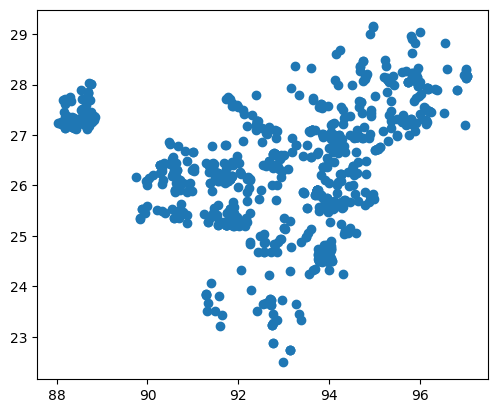

In [16]:
pt_red.plot()

How do you plot these together

<Axes: >

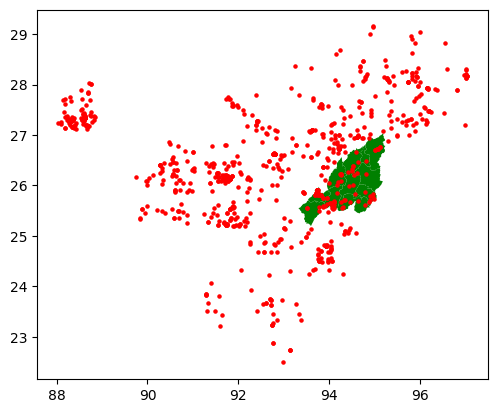

In [17]:
ax = poly_shp.plot(color="green")
pt_red.plot(ax=ax, color="Red",markersize=5)

### Select by Attribute
Two methods are possible to select data. The first is the select by attribute method. As the name suggests, the specific values in the column can be selected quite easily. In the point shapefile we are working with, we have the column STATE which containes state that the tourist point belongs to. We can use indicing here. There is a type of indicing called Boolean indicing which was introduced at the beginning of the lecture. That can be used. For example see the case of the state being Nagaland

In [18]:
# Create a variable for the state being Nagaland
pt_red['STATE']=='Nagaland'

0      False
1      False
2      False
3      False
4      False
       ...  
895    False
896    False
897    False
898    False
899    False
Name: STATE, Length: 900, dtype: bool

In [19]:
#Index the shapefile
pt_nl_attr=pt_red[pt_red['STATE']=='Nagaland']

### Select by Location
The second method for selecting the points is called select by location. This can be performed by firsst creating a geometry of the location, in this case Nagaland, and picking the tourist locations within this geometry. Use the unary_union function to extract the geometry of the Nagaland state. We are having the district boundaries. The uanry_union will join these district boundaries to compile the outermost state boundary. Only the geometry is returned, attributes are not.

In [20]:
nl_full=poly_shp.geometry.unary_union

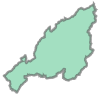

In [21]:
nl_full

In [22]:
pt_nl_loc=pt_red[pt_red.geometry.within(nl_full)]
pt_nl_loc

NAME     STATE type_mod  howpopular  \
230            Piphema  Nagaland   Others           3   
280             Kohima  Nagaland   Others           2   
306     Doyang Village  Nagaland   Others           4   
338            Dimapur  Nagaland   Others           3   
342  Dzukou Valley\n\n   Manipur   Nature           2   
..                 ...       ...      ...         ...   
883          Mt. Paona  Nagaland   Nature           4   
884           Mt. Tiyi  Nagaland   Nature           1   
885            Chekiye  Nagaland   Others           1   
886            Chekiye  Nagaland   Others           4   
887          Naharbari  Nagaland   Others           2   

                      geometry  
230  POINT (93.96119 25.75023)  
280  POINT (94.10860 25.67511)  
306  POINT (94.25441 26.23645)  
338  POINT (93.72656 25.90914)  
342  POINT (94.06465 25.55821)  
..                         ...  
883  POINT (93.86037 25.59419)  
884  POINT (94.27450 26.20913)  
885  POINT (93.74181 25.86839)  
886  POINT (93.74181 25.86839)  
887  POINT (93.75070 25.90267)  

[96 rows x 5 columns]

Note, over here, one of the locations Dzukou valley is spread over both Manipur and Nagaland. The location (coordinates) depicts a point in Nagaland, but the state is marked as Manipur.

## Spatial Join

The select by location operation can be modified in the form of a spatial join. This will also yield similar results but will also include information from the district boundary attribute table.

In [23]:
pt_nl_join = pt_red.sjoin(poly_shp, how="inner", predicate='within')
pt_nl_join

NAME STATE_left type_mod  \
230                                            Piphema   Nagaland   Others   
338                                            Dimapur   Nagaland   Others   
440                                            Dimapur   Nagaland   Others   
454  Nagaland Zoological Park (Rangapahar Reserved ...   Nagaland   Nature   
456                            Chumukedima Village\n\n   Nagaland   Others   
..                                                 ...        ...      ...   
878                                                Mon   Nagaland   Nature   
879                                                Mon   Nagaland   Nature   
782                             Longtrok/ Chungliyimti   Nagaland   Others   
807                                           Tuensang   Nagaland   Others   
808                                           Longleng   Nagaland   Others   

     howpopular                   geometry  index_right  OGC_FID  DISTRICT  \
230           3  POINT (93.96119 25.75023)            9       10   Dimapur   
338           3  POINT (93.72656 25.90914)            9       10   Dimapur   
440           4  POINT (93.72656 25.90914)            9       10   Dimapur   
454           4  POINT (93.72412 25.85307)            9       10   Dimapur   
456           3  POINT (93.75408 25.80406)            9       10   Dimapur   
..          ...                        ...          ...      ...       ...   
878           3  POINT (95.06151 26.73310)            0        1       Mon   
879           4  POINT (95.06151 26.73310)            0        1       Mon   
782           0  POINT (94.61010 26.24816)            4        5  Tuensang   
807           2  POINT (94.81319 26.23574)            4        5  Tuensang   
808           0  POINT (94.81966 26.49020)            1        2  Longleng   

    STATE_right     AREA_SQ_M  ASCII_ID     area1        area2  
230    Nagaland  8.698457e+08       0.0  0.078280   869.845708  
338    Nagaland  8.698457e+08       0.0  0.078280   869.845708  
440    Nagaland  8.698457e+08       0.0  0.078280   869.845708  
454    Nagaland  8.698457e+08       0.0  0.078280   869.845708  
456    Nagaland  8.698457e+08       0.0  0.078280   869.845708  
..          ...           ...       ...       ...          ...  
878    Nagaland  2.184031e+09       0.0  0.198038  2184.030869  
879    Nagaland  2.184031e+09       0.0  0.198038  2184.030869  
782    Nagaland  2.153503e+09       0.0  0.194427  2153.502996  
807    Nagaland  2.153503e+09       0.0  0.194427  2153.502996  
808    Nagaland  5.666508e+08       0.0  0.051327   566.650753  

[96 rows x 13 columns]

## Joining with a non-spatial table

The spatial join merged two shapefile attribute tables based on their sptial relationship. We can also merge non-spatial data with The non-spatial table is read using pandas. I have provided a census

In [24]:
census = pd.read_csv('/content/nnrms/day4/census_nl.csv')
census.head()

State  Code  District Code  Sub District Code  \
0           13            261                  0   
1           13            262                  0   
2           13            263                  0   
3           13            264                  0   
4           13            265                  0   

  India/ State/ Union Territory/ District/ Sub-district        Name  \
0                                           DISTRICT            Mon   
1                                           DISTRICT     Mokokchung   
2                                           DISTRICT      Zunheboto   
3                                           DISTRICT          Wokha   
4                                           DISTRICT       Dimapur    

  Population     Males   Females  Area_sq_km  Population per sq. km.  
0   2,50,260  1,31,753  1,18,507        1786                     140  
1   1,94,622  1,01,092    93,530        1615                     121  
2   1,40,757    71,217    69,540        1255                     112  
3   1,66,343    84,505    81,838        1628                     102  
4   3,78,811  1,97,394  1,81,417         927                     409

We can work with pandas similar to how we worked with geopandas including all indexing and selection of columns. We use the merge function to estimate

In [25]:
cens_join = poly_shp.merge(census, left_on='DISTRICT',right_on='Name')

In [26]:
cens_join

OGC_FID    DISTRICT     STATE     AREA_SQ_M  ASCII_ID  \
0        1         Mon  Nagaland  2.184031e+09       0.0   
1        2    Longleng  Nagaland  5.666508e+08       0.0   
2        3  Mokokchung  Nagaland  1.626065e+09       0.0   
3        4       Wokha  Nagaland  1.623852e+09       0.0   
4        5    Tuensang  Nagaland  2.153503e+09       0.0   
5        6       Peren  Nagaland  1.714333e+09       0.0   
6        7     Kiphire  Nagaland  1.126545e+09       0.0   
7        8        Phek  Nagaland  1.855884e+09       0.0   
8        9   Zunheboto  Nagaland  1.570305e+09       0.0   
9       11      Kohima  Nagaland  1.292621e+09       0.0   

                                            geometry     area1        area2  \
0  POLYGON ((95.19297 27.03202, 95.19315 27.03201...  0.198038  2184.030869   
1  POLYGON ((94.79416 26.79625, 94.79455 26.79613...  0.051327   566.650753   
2  POLYGON ((94.73584 26.76448, 94.73623 26.76395...  0.147181  1626.064899   
3  POLYGON ((94.28240 26.53391, 94.28226 26.53331...  0.146629  1623.851503   
4  POLYGON ((94.91017 26.37729, 94.91021 26.37725...  0.194427  2153.502996   
5  POLYGON ((93.53998 25.69971, 93.54087 25.69945...  0.153922  1714.332759   
6  POLYGON ((95.01725 25.88778, 95.01726 25.88780...  0.101433  1126.544742   
7  POLYGON ((94.45529 25.84898, 94.45550 25.84887...  0.166832  1855.884134   
8  POLYGON ((94.58683 26.21229, 94.58703 26.21206...  0.141567  1570.305417   
9  POLYGON ((94.21567 26.02002, 94.21591 26.02002...  0.116309  1292.621242   

   State  Code  District Code  Sub District Code  \
0           13            261                  0   
1           13            268                  0   
2           13            262                  0   
3           13            264                  0   
4           13            267                  0   
5           13            271                  0   
6           13            269                  0   
7           13            266                  0   
8           13            263                  0   
9           13            270                  0   

  India/ State/ Union Territory/ District/ Sub-district        Name  \
0                                           DISTRICT            Mon   
1                                           DISTRICT       Longleng   
2                                           DISTRICT     Mokokchung   
3                                           DISTRICT          Wokha   
4                                           DISTRICT       Tuensang   
5                                           DISTRICT          Peren   
6                                           DISTRICT        Kiphire   
7                                           DISTRICT           Phek   
8                                           DISTRICT      Zunheboto   
9                                           DISTRICT         Kohima   

  Population     Males   Females  Area_sq_km  Population per sq. km.  
0   2,50,260  1,31,753  1,18,507        1786                     140  
1     50,484    26,502    23,982         562                      90  
2   1,94,622  1,01,092    93,530        1615                     121  
3   1,66,343    84,505    81,838        1628                     102  
4   1,96,596  1,01,933    94,663        2536                      78  
5     95,219    49,714    45,505        1651                      58  
6     74,004    37,830    36,174        1130                      65  
7   1,63,418    83,743    79,675        2026                      81  
8   1,40,757    71,217    69,540        1255                     112  
9   2,67,988  1,38,966  1,29,022        1463                     183